<a href="https://colab.research.google.com/github/Suresh-kg/oasis/blob/main/oasis_task4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('apps.csv')
df.head()

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
# prompt: convert categorical data

import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Get list of categorical variables
s = (df.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables:")
print(object_cols)

# Apply one-hot encoder to each column with categorical data
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
OH_cols = pd.DataFrame(OH_encoder.fit_transform(df[object_cols]))


# One-hot encoding removed index; put it back
OH_cols.index = df.index

# Remove categorical columns (will replace with one-hot encoding)
num_df = df.drop(object_cols, axis=1)

# Add one-hot encoded columns to numerical features
OH_df = pd.concat([num_df, OH_cols], axis=1)

Categorical variables:
['App', 'Category', 'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver']


In [ ]:
OH_df.head()

,Unnamed: 0,Rating,Reviews,0,1,2,3,4,5,6,...,14612,14613,14614,14615,14616,14617,14618,14619,14620,14621
0,0,4.1,159,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,3.9,967,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,4.7,87510,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,4.5,215644,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,4.3,967,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
print(OH_df.info())
print("\nOriginal numerical columns from df:")
print(num_df.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9659 entries, 0 to 9658
Columns: 14625 entries, Unnamed: 0 to 14621
dtypes: float64(14623), int64(2)
memory usage: 1.1 GB
None

Original numerical columns from df:
Index(['Unnamed: 0', 'Rating', 'Reviews'], dtype='object')


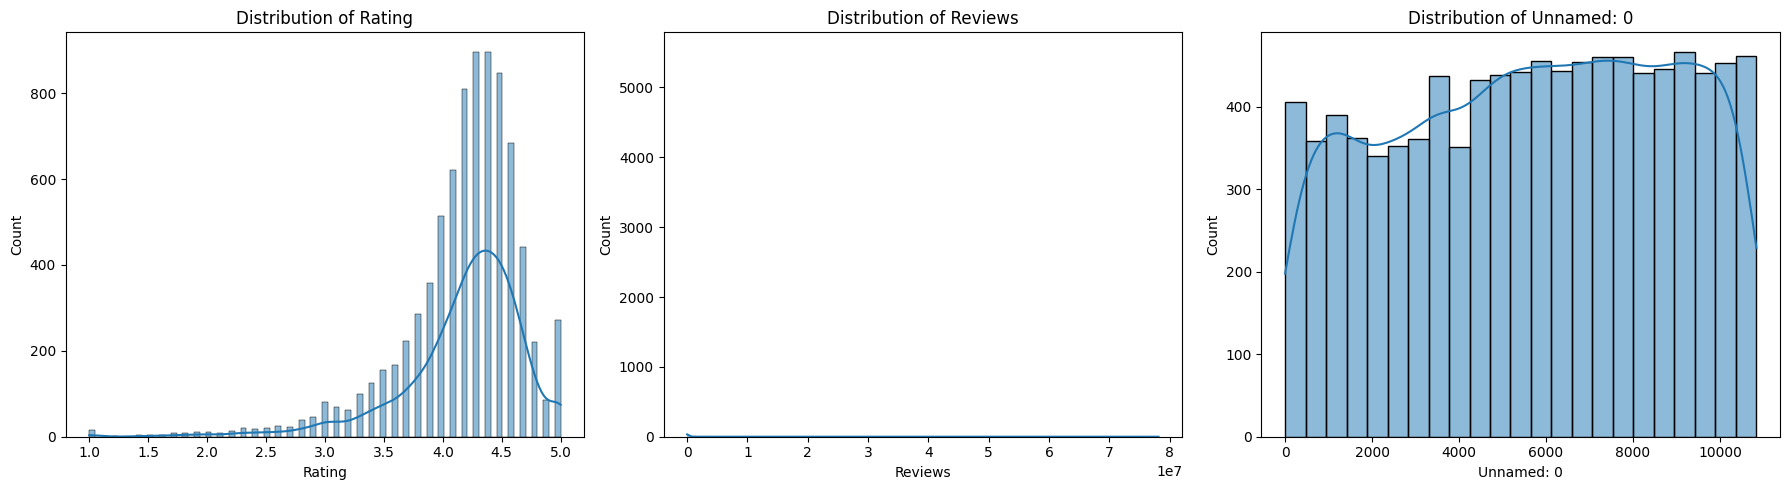

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 5))

sns.histplot(data=OH_df, x='Rating', ax=axes[0], kde=True)
axes[0].set_title('Distribution of Rating')

sns.histplot(data=OH_df, x='Reviews', ax=axes[1], kde=True)
axes[1].set_title('Distribution of Reviews')

sns.histplot(data=OH_df, x='Unnamed: 0', ax=axes[2], kde=True)
axes[2].set_title('Distribution of Unnamed: 0')

plt.tight_layout()
plt.show()

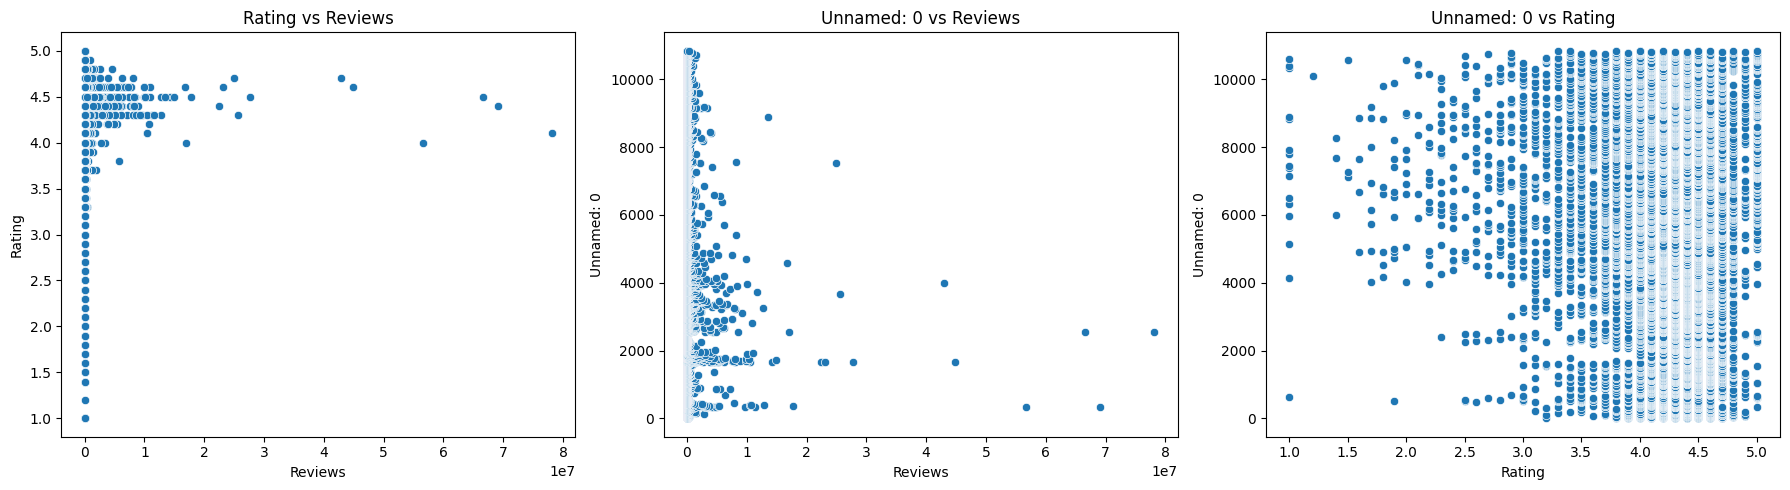

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 5))

sns.scatterplot(data=OH_df, x='Reviews', y='Rating', ax=axes[0])
axes[0].set_title('Rating vs Reviews')

sns.scatterplot(data=OH_df, x='Reviews', y='Unnamed: 0', ax=axes[1])
axes[1].set_title('Unnamed: 0 vs Reviews')

sns.scatterplot(data=OH_df, x='Rating', y='Unnamed: 0', ax=axes[2])
axes[2].set_title('Unnamed: 0 vs Rating')

plt.tight_layout()
plt.show()

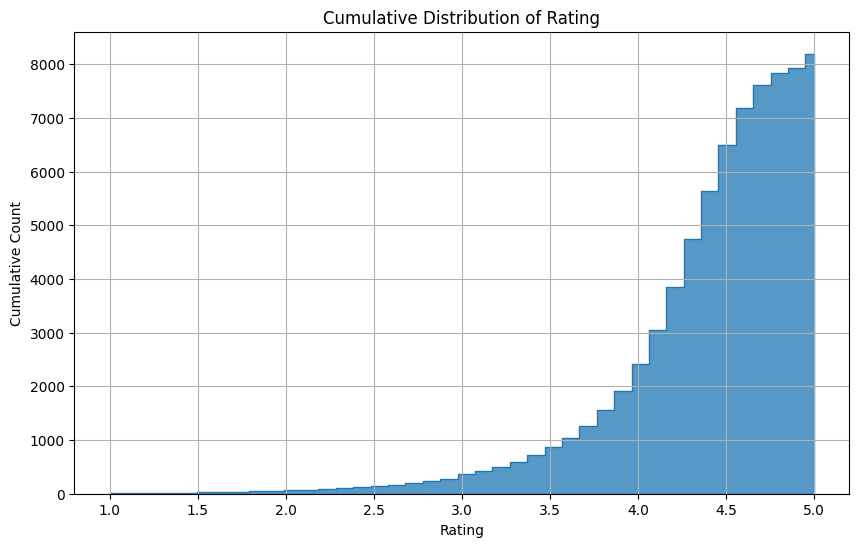

In [ ]:
# Create an area chart for the cumulative distribution of 'Rating'
plt.figure(figsize=(10, 6))
sns.histplot(data=OH_df, x='Rating', cumulative=True, element="step", fill=True)
plt.title('Cumulative Distribution of Rating')
plt.xlabel('Rating')
plt.ylabel('Cumulative Count')
plt.grid(True)
plt.show()

<ipython-input-23-17f365ccd18a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(data=df, x='Category', y='Rating', alpha=0.5, palette='viridis', size=4)


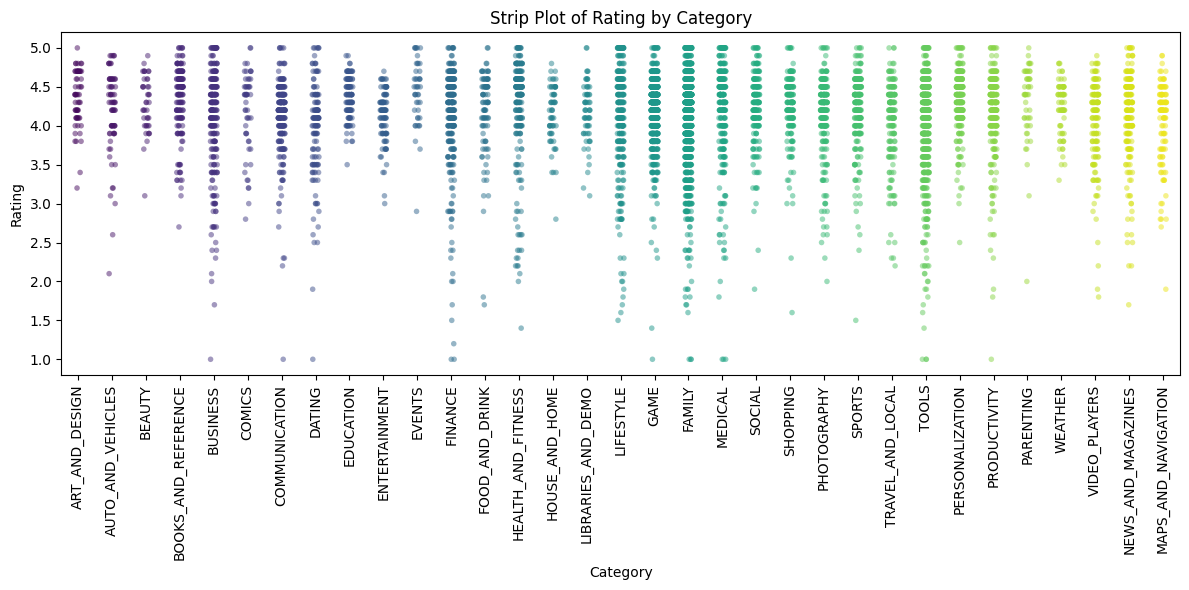

In [ ]:
plt.figure(figsize=(12, 6))
sns.stripplot(data=df, x='Category', y='Rating', alpha=0.5, palette='viridis', size=4)
plt.xticks(rotation=90)
plt.title('Strip Plot of Rating by Category')
plt.xlabel('Category')
plt.ylabel('Rating')
plt.tight_layout()
plt.show()

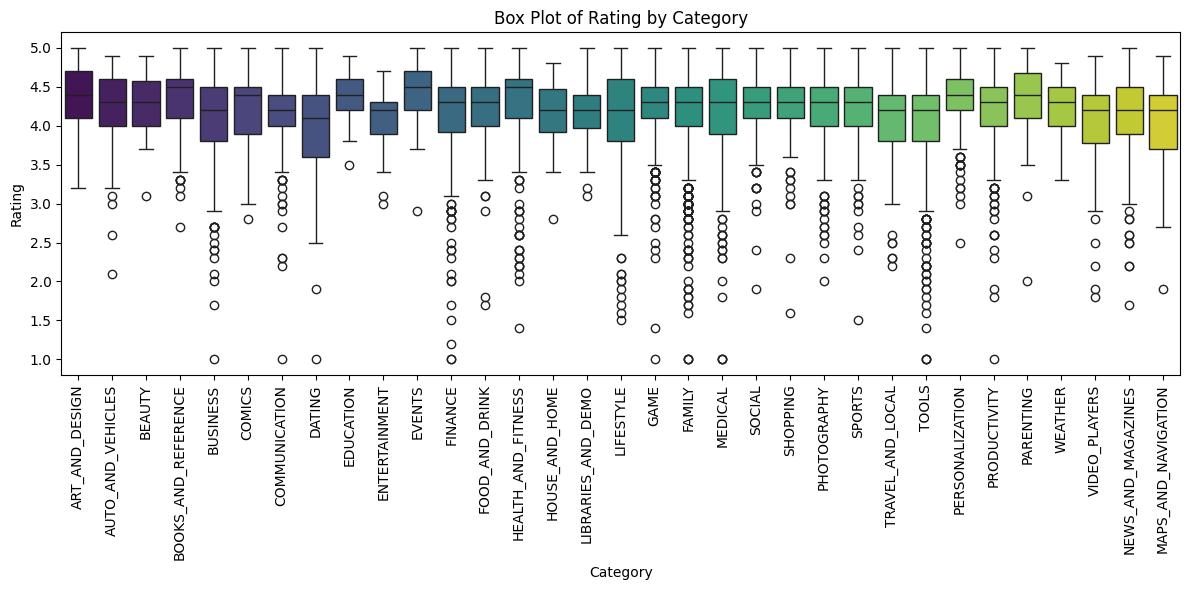

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Category', y='Rating', hue='Category', palette='viridis', legend=False)
plt.xticks(rotation=90)
plt.title('Box Plot of Rating by Category')
plt.xlabel('Category')
plt.ylabel('Rating')
plt.tight_layout()
plt.show()